# Exploratory Data Analysis

### This git hub repo has been created to understand data using Python. 

Dataset : Happiness Ranking of countries from different region

Goal of this data :-

1. Understand the data 
2. Using correlation to determine the independant variables 
3. Analyze the numerical values 
4. Remove the outliers and then analyze the numerical values 
5. Analyze the categorical values 
6. How can we create dummy variables - numerical values for our model 

In [62]:
#Importing required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
#Load the data (.csv file) in a data frame
Happiness = pd.read_csv("Happiness_2015.csv")

In [64]:
#By Data frame i mean a matrix with dimensions (No. of Rows X No. of Columns)
#The result shows that the number of rows are 158 - Number of examples/Rows ; 
#12 - Number of features/Columns (That describe each example)
print(Happiness.shape)

(158, 12)


In [65]:
#Viewing the columns/features in the data frame Happiness
Happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [66]:
#Viewing the data types of each column/feature
print(Happiness.info())

# The output y can be Happiness Rank OR Happiness Score
#There are 2 categorical values ; 'Country' + 'Region'
#There are 7 numerical values (We are not going to include Standard error in the dataset) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
None


In [67]:
#Check for any missing values in the dataset
#Checking the misssing values if any for any of the features
print(Happiness.isnull().sum())
#There are no missing values for this data - As the sum of all the values are showing as 0

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [68]:
#To get a sense of the max , min , mean , count etc of the numerical data
Happiness.loc[:, (Happiness.dtypes == 'float64') | (Happiness.dtypes == 'int64')].describe()
#We are looking at describing only the features of the data type : float64 and int64

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [69]:
#Having a sense of the data  , lets now view the first 5 rows of the data
Happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Analyze the Numerical Values

From our analysis above we can see that :-

1. We can consider Happiness Score / Happiness Rank as y == Output
2. We now need to understand what the distribution of values are for each feature/column and how it highly it is correlated to the Happiness Score

How do i measure the numerical values with respect to the Happiness Score?

1. Correlation of the independant variable with the output / dependant variable (Happiness Score)
2. Distribution of the numerical value for all 158 examples

The 7 numberical Values (Independant Variables/X) who's correlation to the Happiness Score we are going to take are:-

1. Economy (GDP per Capita)         
2. Family                           
3. Health (Life Expectancy)         
4. Freedom                          
5. Trust (Government Corruption)    
6. Generosity                       
7. Dystopia Residual  

# 1. Correlation of Happiness Score with 'Economy (GDP Per Capita)'

In [70]:
#Helper function to perform EDA on Numerical variables.
def analyze_numeric(data, feature_var, color_plot):
    #plt.figure()
    #print(data[feature_var].describe())
    print("Correlation between variables")
    print(data[[feature_var,'Happiness Score']].corr())   #Print the correlation value.
    fig, axs = plt.subplots(figsize= (15,8),ncols=2) #creating figure with multiple axes.
    plt.subplots_adjust(right=1)
    sns.boxplot(data[feature_var], color = color_plot ,ax=axs[0]) #explains the distribution of the variable
    axs[0].set_title('Distribution of '+ feature_var)
    sns.regplot(x=feature_var, y='Happiness Score', color = color_plot,  data=data, ax= axs[1]) #regression plot for label vs feature variable
    axs[1].set_title(feature_var + ' Vs Happiness Score')

Correlation between variables
                          Economy (GDP per Capita)  Happiness Score
Economy (GDP per Capita)                  1.000000         0.780966
Happiness Score                           0.780966         1.000000


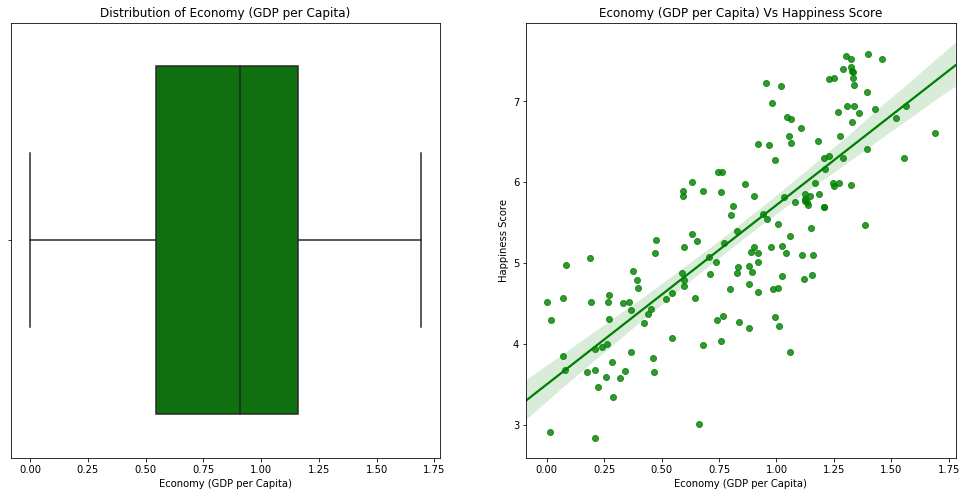

In [71]:
analyze_numeric(Happiness, 'Economy (GDP per Capita)', 'green')
#Data is well distributed around the straight line agaisnt the Happiness Score variable
#correlation is 0.780

# 2. Correlation of Happiness Score with 'Family'

Correlation between variables
                   Family  Happiness Score
Family           1.000000         0.740605
Happiness Score  0.740605         1.000000


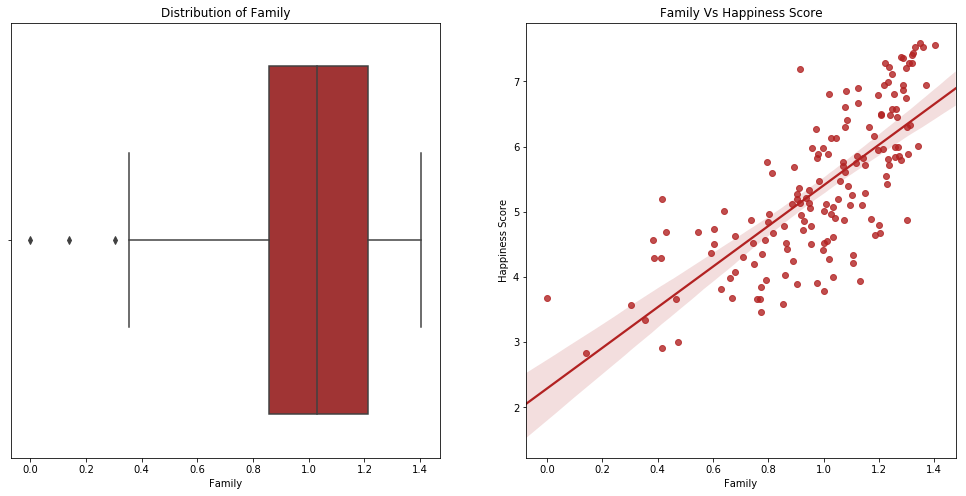

In [72]:
analyze_numeric(Happiness, 'Family', 'firebrick')
#Data is well distributed around the straight line agaisnt the Happiness Score variable
#correlation is 0.7406

# 3. Correlation of Happiness Score with 'Health (Life Expectancy)'

Correlation between variables
                          Health (Life Expectancy)  Happiness Score
Health (Life Expectancy)                    1.0000           0.7242
Happiness Score                             0.7242           1.0000


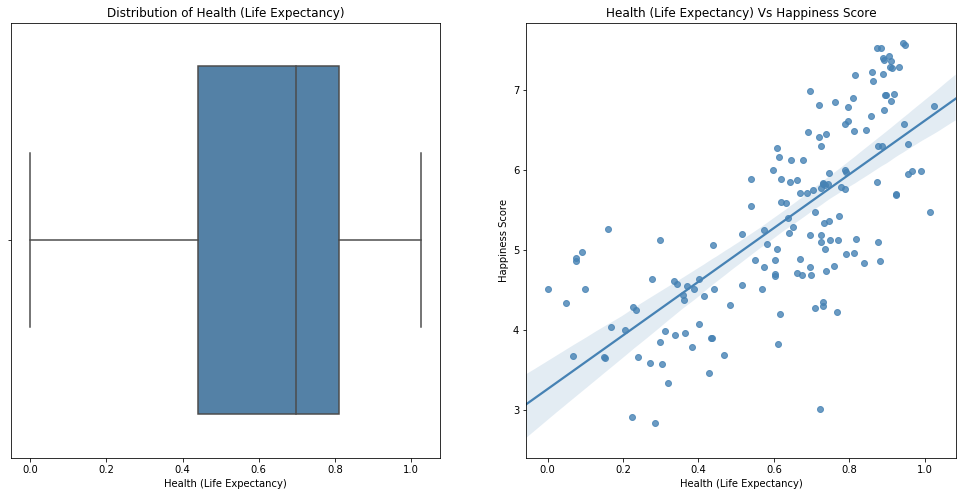

In [73]:
analyze_numeric(Happiness, 'Health (Life Expectancy)', 'steelblue')
#Data is well distributed around the straight line agaisnt the Happiness Score variable
#correlation is 0.7242

# 4. Correlation of Happiness Score with 'Freedom'

Correlation between variables
                  Freedom  Happiness Score
Freedom          1.000000         0.568211
Happiness Score  0.568211         1.000000


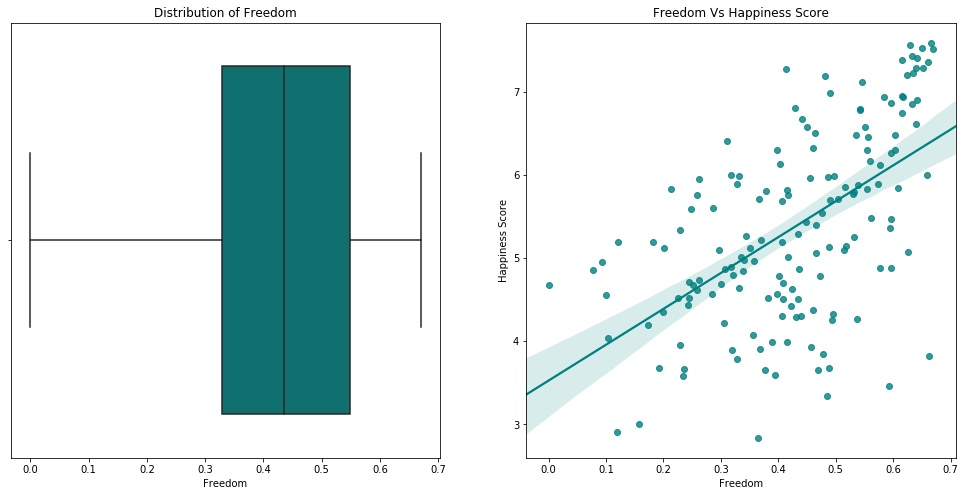

In [74]:
analyze_numeric(Happiness, 'Freedom', 'teal')
#There are couple of outliers for Freedom variable 
#Data is well distributed around the straight line agaisnt the price variable
#correlation is 0.5682

# 5. Correlation with 'Trust (Government Corruption)'

Correlation between variables
                               Trust (Government Corruption)  Happiness Score
Trust (Government Corruption)                       1.000000         0.395199
Happiness Score                                     0.395199         1.000000


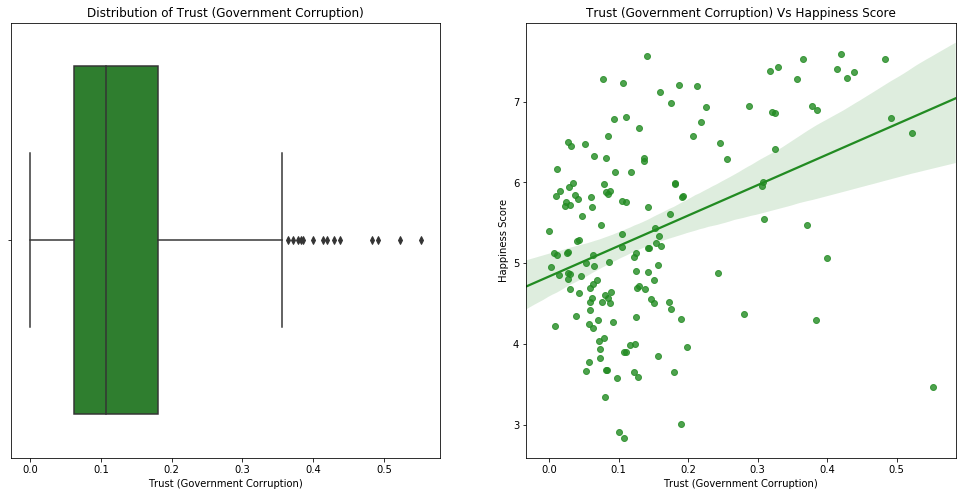

In [75]:
analyze_numeric(Happiness, 'Trust (Government Corruption)', 'forestgreen')
#Data is not well distributed around the straight line agaisnt the Happiness Score variable
#correlation is 0.395

# 6. Correlation with 'Generosity'

Correlation between variables
                 Generosity  Happiness Score
Generosity         1.000000         0.180319
Happiness Score    0.180319         1.000000


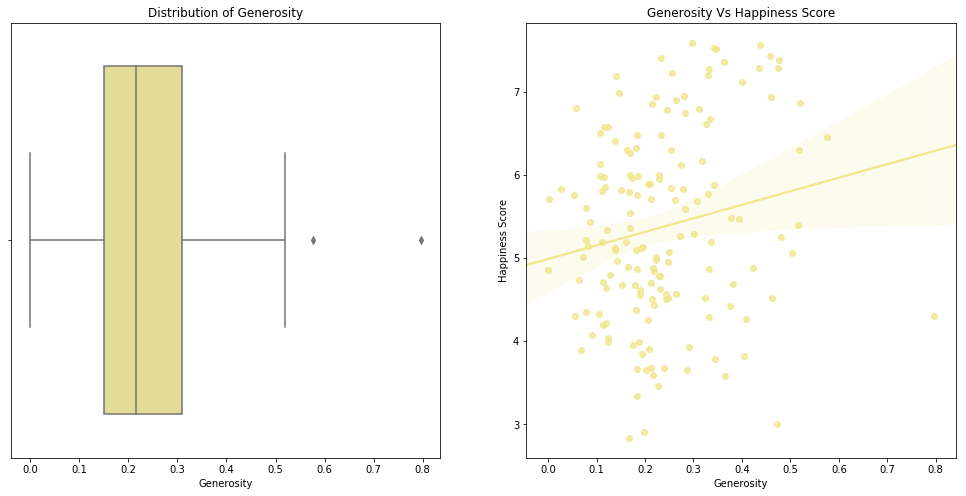

In [76]:
analyze_numeric(Happiness, 'Generosity', 'khaki')
#Data is not well distributed around the straight line agaisnt the Happiness Score variable
#correlation is LOW - 0.1803

# 7. Correlation of Happiness Score with 'Dystopia Residual'

Correlation between variables
                   Dystopia Residual  Happiness Score
Dystopia Residual           1.000000         0.530474
Happiness Score             0.530474         1.000000


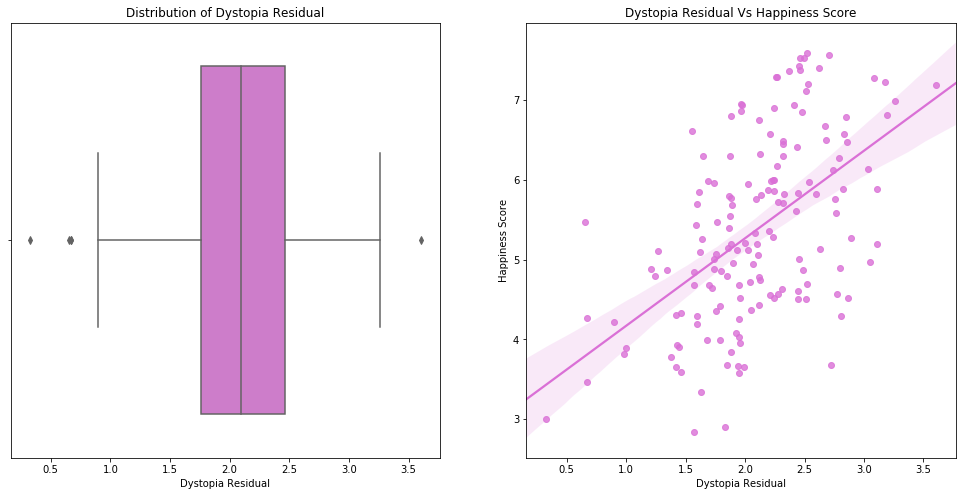

In [77]:
analyze_numeric(Happiness, 'Dystopia Residual', 'orchid')
#Data is not well distributed around the straight line agaisnt the price variable
#correlation is Low - 0.530

## Summary of Numerical Analysis 

We have analysed the beolow 7 numerical independant variables against the dependant variable : Happiness Score

1. Economy (GDP per Capita)
2. Family
3. Health (Life Expectancy)
4. Freedom
5. Trust (Government Corruption)
6. Generosity
7. Dystopia Residual

# Results 

1. Economy (GDP per Capita) : Correlation with Happpiness Score is 0.780
2. Family: Correlation with Happpiness Score is 0.7406
3. Health (Life Expectancy): Correlation with Happpiness Score is 0.7242
4. Freedom: Correlation with Happpiness Score is 0.5682
5. Trust (Government Corruption): Correlation with Happpiness Score is 0.395
6. Generosity: Correlation with Happpiness Score is 0.180
7. Dystopia Residual: Correlation with Happpiness Score is 0.530

# Conclusion

1. Economy (GDP per Capita) , Family and Health are the biggest predictors of Happiness in a country 
2. Generosity is the least predictor of the Happiness in a country 


In [78]:
# Lets  now attempt to understand the categorical values

# Analyze Categorical Values

The 2 categorical values in this dataset are:-

1. Country 
2. Region 

I am going to avoid using 'Country' in this analysis. As country is not a predictor of the Happiness -it can be used as a unique identifier


The goal of the analysis

1. Does this dataset contain more countries from a single region?
2. Which region has the most happiest countries?

Text(0.5,1,'Region Vs Happiness Score')

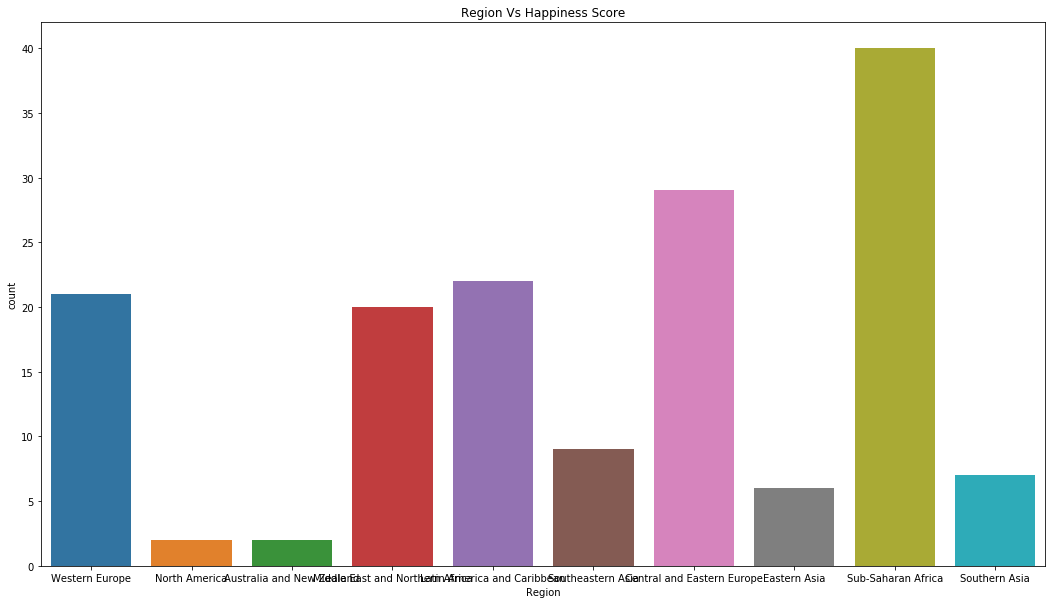

In [79]:
#Region, plotting this on a 
plt.subplots(figsize= (18,10))
sns.countplot(x='Region', data=Happiness)
plt.title('Region' + ' Vs Happiness Score')
#In this dataset the number of countries in 'Sub-Saharan Africa' is maximum followed by 'Central and Eastern Europe'

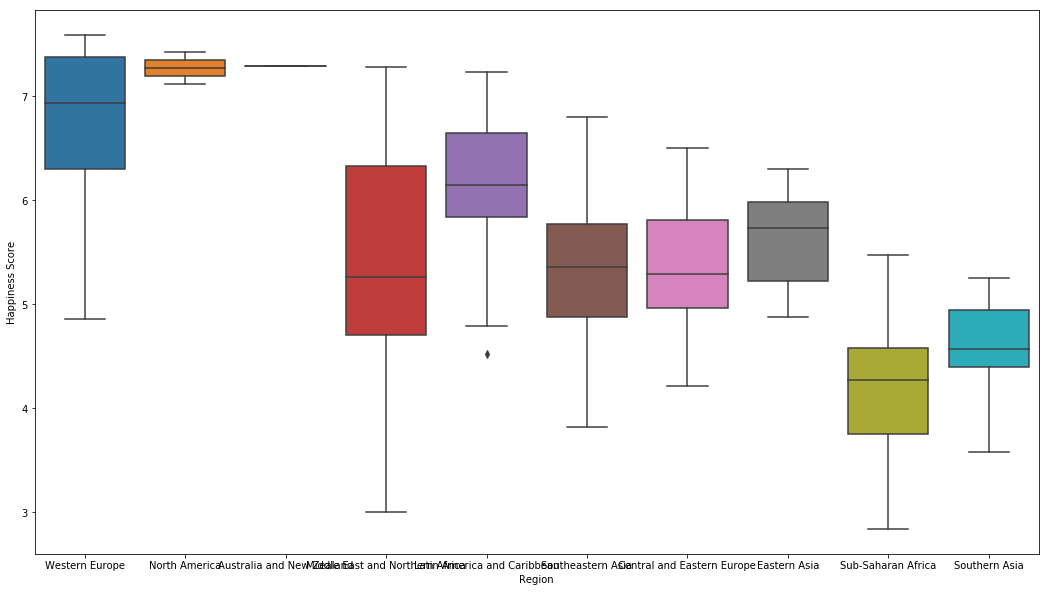

In [80]:
#We are now attempting to plot the number of countries in each region and the magnitude of the happiness score within each region
plt.subplots(figsize= (18,10))
sns.boxplot(x='Region', y='Happiness Score', data=Happiness)
#Countries from Western Europe seems to be most Happiest

In [81]:
#Get to the number of countries within each region
Happiness.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

# Conclusion of analyzing the categorical values

1. The dataset contains a large number of countries from regions 'Sub-Saharan Africa' followed by 'Central and Eastern Europe
2. The countries from Western Europe are the happiest

# What are we going to do with this data?

NOTE : Machine Learning and Deep Learning Models use numerical data only. Categorical values cannot be used. 

We will now convert the categorical values with more than 2 values to columns using pd.dummies

# Using pd.dummies

In [82]:
#creating dummy variables for categorical columns with more than 2 levels.
dummy_variables = pd.get_dummies(Happiness.loc[:,['Region']],drop_first=True)
Happiness = pd.concat([Happiness,dummy_variables],axis=1)

In [83]:
#Lets take a look at the dummy variables
print(dummy_variables.info())
#One Categorical Value : Region has been converted to 9 columns that can have a value of 0/1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
Region_Central and Eastern Europe         158 non-null uint8
Region_Eastern Asia                       158 non-null uint8
Region_Latin America and Caribbean        158 non-null uint8
Region_Middle East and Northern Africa    158 non-null uint8
Region_North America                      158 non-null uint8
Region_Southeastern Asia                  158 non-null uint8
Region_Southern Asia                      158 non-null uint8
Region_Sub-Saharan Africa                 158 non-null uint8
Region_Western Europe                     158 non-null uint8
dtypes: uint8(9)
memory usage: 1.5 KB
None


# Having X and Y ready

What have we done so far?

1. Analyzed the numberical values 
2. Analyzed the categorical values
3. Determined the highest predictor of Happiness in the numerical columns
4. Noted how the dataset is skewed towards countries of a particular region


# X ==> Input variables are

1. Economy (GDP per Capita) 
2. Family
3. Health (Life Expectancy)
4. Freedom
5. Trust (Government Corruption)
6. Generosity
7. Dystopia Residual
8. Region_Central and Eastern Europe
9. Region_Eastern Asia             
10. Region_Latin America and Caribbean
11. Region_Middle East and Northern Africa
12. Region_North America                  
13. Region_Southeastern Asia              
14. Region_Southern Asia                  
15. Region_Sub-Saharan Africa             
16. Region_Western Europe                 

# Y ==> Output variable is

Happiness score

# GOAL

1. Create a X dataframe of dimension 158 X 16 
2. Create a Y datafram of dimension 158 x 1 
3. Combine the above to form the training set to have a dimension of 158 x 17

In [84]:
#seperating the independent variables and dependent variables

#selecting all the variables except those for which we have created dummy variables, car_ID, price column
X = Happiness[Happiness.columns.difference(['Country','Region','Happiness Rank','Happiness Score'])]
print(X.shape)

#Creating the dependent variable price as Y
Y = Happiness.loc[:,['Happiness Score']]
print(Y.shape)

(158, 17)
(158, 1)


In [86]:
#Creating a new dataframe to keep the required variables for VIF analysis etc.
Happiness_vars = pd.concat([X,Y],axis=1)
print(Happiness_vars.shape)

(158, 18)


# Next step is to apply different algorithm models to this data! 